In [50]:
!git clone https://github.com/amokhvarma/ELL793_Assignments.git

fatal: destination path 'ELL793_Assignments' already exists and is not an empty directory.


In [34]:
%cd ELL793_Assignments/Assignment2

/content/ELL793_Assignments/Assignment2/ELL793_Assignments/Assignment2


In [35]:
!python main.py --help

usage: main.py [-h] [--expt EXPT] [--layers LAYERS] [--activation ACTIVATION]
               [--epochs EPOCHS] [--early EARLY] [--batch BATCH] [--hid HID]
               [--reg [REG]] [--dropout [DROPOUT]]
               [--dropout_rate DROPOUT_RATE] [--lr LR] [--scratch [SCRATCH]]
               [--explanation EXPLANATION] [--seed SEED]
               [--normalise NORMALISE] [--save [SAVE]]

optional arguments:
  -h, --help            show this help message and exit
  --expt EXPT           Expt Number
  --layers LAYERS       Hidden Layers
  --activation ACTIVATION
                        Activation Function
  --epochs EPOCHS       Number of Epochs
  --early EARLY         Early Stopping Patience (0) for no ES
  --batch BATCH         Batch Size
  --hid HID             Hidden Dimensions
  --reg [REG]           Regularisation
  --dropout [DROPOUT]   Dropout
  --dropout_rate DROPOUT_RATE
                        Dropout Rate
  --lr LR               Learning Rate
  --scratch [SCRATCH]   Trai

In [36]:
!python main.py --expt 2 --layers 2 --hid 128 --early 10 --epochs 75 --lr 0.01 --scratch True --batch 128 --save True

170499072it [00:11, 14850687.88it/s]                   
Extracting cifar/cifar-10-python.tar.gz to cifar/
Train : 42000, Validation : 8000, Test : 10000 
<class 'torch.Tensor'> <class 'torch.Tensor'> torch.Size([128, 3, 32, 32]) torch.Size([128])
Number of parameters :  66
Epoch : 0 ,Train Acc : 0.5757619047619048, Train Loss : 1.2086718807447525, Val Acc : 0.646125, Val Loss : 0.00010342519090045244
Epoch : 1 ,Train Acc : 0.7439285714285714, Train Loss : 0.7367175451006208, Val Acc : 0.708375, Val Loss : 0.00013080592907499522
Epoch : 2 ,Train Acc : 0.8039285714285714, Train Loss : 0.5599711232071831, Val Acc : 0.736375, Val Loss : 0.00010750824731076136
Epoch : 3 ,Train Acc : 0.8498095238095238, Train Loss : 0.4303625001453218, Val Acc : 0.702375, Val Loss : 0.00017854171164799482
Epoch : 4 ,Train Acc : 0.8811904761904762, Train Loss : 0.33511675298781624, Val Acc : 0.740125, Val Loss : 0.00012126114597776905
Epoch : 5 ,Train Acc : 0.9142857142857143, Train Loss : 0.2448297005380903,

In [41]:
from utils import *
class temp:
        def __init__(self):
            self.normalise = 'standard'
            self.seed = 10
            self.layers = 2
            self.expt = 2
            self.batch = 128
            self.epochs= 75
            self.early = 10
            self.dropout = False
            self.reg = False
            self.dropout_rate = 0.0
            self.activation = 'relu'
            self.lr = 0.01
            self.hid = 128
            self.scratch = True
            self.name = None 
            self.device = None
    
args = temp() 
args.name = 'Expt{}_l{}_ep{}_early{}_reg{}_dr{}_rate_{}_act{}_hid{}_lr{}_sc{}_bch{}__norm{}_seed{}'.format(args.expt,args.layers,args.epochs,args.early,args.reg,args.dropout,args.dropout_rate,args.activation,args.hid,args.lr,args.scratch,args.batch,args.normalise,args.seed)
name = args.name
print(name)
args.device = 'cuda' if torch.cuda.is_available() else 'cpu'

Expt2_l2_ep75_early10_regFalse_drFalse_rate_0.0_actrelu_hid128_lr0.01_scTrue_bch128__normstandard_seed10


In [51]:
import torch
import numpy as np
import matplotlib.pyplot as plt


import numpy as np
import matplotlib.pyplot as plt

def multi_plot(X,w=10,h=10,columns=3,rows=2):

    #w = 10
    #h = 10
    fig = plt.figure(figsize=(9, 9))
    #columns = 3
    #rows = 2

    # prep (x,y) for extra plotting
    #xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
    #ys = np.abs(np.sin(xs))           # absolute of sine

    # ax enables access to manipulate each of subplots
    ax = []

    for i in range(columns*rows):
        img = X[i]
        # create subplot and append to ax
        ax.append( fig.add_subplot(rows, columns, i+1) )
        ax[-1].set_title("Conv : "+str(i))  # set title
        plt.imshow(img, alpha=0.25)

    # do extra plots on selected axes/subplots
    # note: index starts with 0
    #ax[2].plot(xs, 3*ys)
    #ax[19].plot(ys**2, xs)

    plt.show()

Files already downloaded and verified
Train : 42000, Validation : 8000, Test : 10000 
<class 'torch.Tensor'> <class 'torch.Tensor'> torch.Size([128, 3, 32, 32]) torch.Size([128])
torch.Size([128, 64, 8, 8])
torch.Size([128, 64, 8, 8])
torch.Size([128, 64, 8, 8])
torch.Size([128, 64, 8, 8])
torch.Size([128, 64, 8, 8])
torch.Size([128, 64, 8, 8])
torch.Size([128, 64, 8, 8])
torch.Size([128, 64, 8, 8])
torch.Size([128, 64, 8, 8])


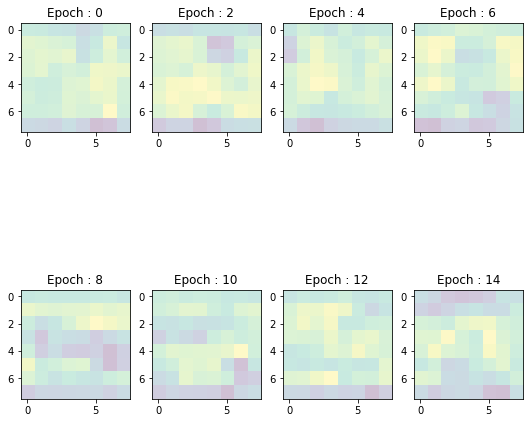

In [46]:
def print_train(path,args):
    X = []

    data_train,_,_ = load_cifar(args)
    for epoch in ["0","2","4","6","8","10","12","14","16"]:
        name = path + '/model_{}'.format(epoch)+'.pth'
        model = Res_Net(args)
        model.load_state_dict(torch.load(name))
        activation = {}
        def getActivation(name):
            def hook(model,input,output):
                activation[name] = output.detach()
            return hook
        
        #h = model.backbone.conv1.register_forward_hook(getActivation("Conv1"))

        h = model.backbone.layer1[0].conv1.register_forward_hook(getActivation("Conv1"))
        for x,y in data_train:
            out = model(x)
            output = activation["Conv1"]
            print(output.shape)
            X.append(output[0][0]) # Taking 0th filter
            break
        
    #print(X)
    return X 

X = print_train("Results/Expt2_l2_ep75_early10_regFalse_drFalse_rate_0.0_actrelu_hid128_lr0.01_scTrue_bch128__normstandard_seed10",args)

multi_plot(X,10,10,4,2)

Files already downloaded and verified
Train : 42000, Validation : 8000, Test : 10000 
<class 'torch.Tensor'> <class 'torch.Tensor'> torch.Size([128, 3, 32, 32]) torch.Size([128])
torch.Size([128, 64, 16, 16])
torch.Size([128, 64, 8, 8])
torch.Size([128, 64, 8, 8])
torch.Size([128, 128, 4, 4])
torch.Size([128, 128, 4, 4])
torch.Size([128, 256, 2, 2])
torch.Size([128, 256, 2, 2])
torch.Size([128, 512, 1, 1])


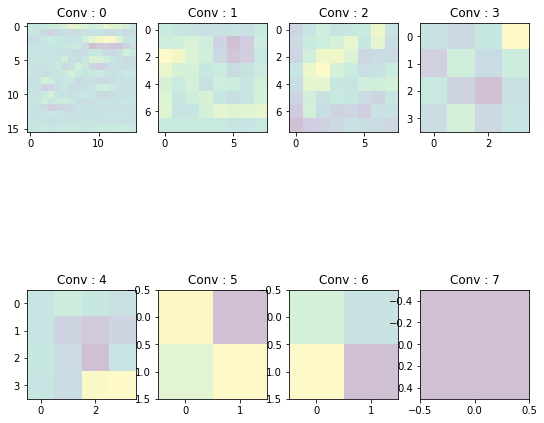

In [52]:
X = []

data_train,_,_ = load_cifar(args)
model = Res_Net(args)
model.load_state_dict(torch.load("Results/"+name+"/model_best.pth"))
activation = {}
def getActivation(name):
    def hook(model,input,output):
        activation[name] = output.detach()
    return hook

h1 = model.backbone.conv1.register_forward_hook(getActivation("1"))
h2 = model.backbone.layer1[0].conv1.register_forward_hook(getActivation("2"))
h3 = model.backbone.layer1[1].conv2.register_forward_hook(getActivation("3"))
h4 = model.backbone.layer2[0].conv1.register_forward_hook(getActivation("4"))
h5 = model.backbone.layer2[1].conv1.register_forward_hook(getActivation("5"))
h6 = model.backbone.layer3[0].conv1.register_forward_hook(getActivation("6"))
h7 = model.backbone.layer3[0].conv2.register_forward_hook(getActivation("7"))
h8 = model.backbone.layer4[1].conv2.register_forward_hook(getActivation("8"))


for x,y in data_train:
    out = model(x)
    for n in range(1,9):
        output = activation[str(n)]
        print(output.shape)
        X.append(output[0][0]) # Taking 0th filter
    break

multi_plot(X,10,10,4,2)